# A DATA SCIENCE CAUSAL INFERENCE SPECIALIST PORTFOLIO PROJECT

## Amazon Affiliate Marketing Performance

### INTRODUCTION & OVERVIEW

This comprehensive dataset provides real-world insights into Amazon Affiliate marketing performance, featuring detailed analytics on user behavior, product conversions, and revenue optimization strategies. Perfect for data scientists, marketing analysts, and e-commerce professionals looking to understand and improve affiliate marketing performance.

#### PROJECT GOALS

The Primary goal of the project is based on the question below: 

#### What is the causal effect of traffic source, product page exposure, seasonality, and user type (new vs returning) on conversion probability and affiliate revenue in an e-commerce affiliate platform?

This project also covers the following causal inference analysis questions:

Marketing Analytics
- Conversion Rate Optimization: How does exposure to high-performing product pages causally increase conversion rates relative to other pages?
- Customer Journey Mapping: What is the causal impact of early-stage user actions (first click source or landing page) on eventual purchase completion?
- Attribution Modeling: What is the causal contribution of each traffic source (organic, paid, social, referral) to conversions, compared to a counterfactual scenario where that source was absent?
- Seasonal Trend Analysis: What is the causal effect of seasonal periods (e.g., holiday vs non-holiday) on conversion rates across different product categories?

Business Intelligence
- Revenue Forecasting: How does an increase in user traffic from specific sources causally affect affiliate revenue over time?
- Product Performance: What is the causal effect of promoting specific product categories on revenue and conversion outcomes?
- User Segmentation: How does being a returning customer (versus a new customer) causally affect conversion probability and average order value?
- Geographic Analysis: What is the causal effect of user geographic location on conversion rates, after controlling for traffic source and product exposure?

Causal Churn Analysis
- Traffic Source & Churn: What is the causal effect of traffic source on the probability of user churn within 30 days?
- Early Engagement & Churn: How does early-session engagement causally affect the likelihood of user churn?
- Product Exposure & Churn: Does exposure to discounted or highly rated products causally reduce churn?

#### DATA

- Data Source: Amazon Affiliate Marketing Performance Dataset (2024)
- Source: Kaggle.com
- Generated using AffiliateMatic.com analytics platform


Dataset Highlights

500+ comprehensive data points across multiple dimensions
Real-time tracking of user interactions and conversions
Multi-device analytics covering desktop, mobile, and tablet users
Global reach with data from US, Canada, UK, Germany, and Australia
Comprehensive funnel analysis from awareness to conversion

Dataset Files

1. amazon_affiliate_clicks.csv
   
- User Click Behavior Analytics: 100+ detailed click events with timestamps
Product information (ASIN, title, category, price)
User journey tracking (source page, referrer, UTM parameters)
Device and geographic data
Engagement metrics (scroll depth, time on page)

- Key Columns: click_id, user_id, session_id, timestamp
product_asin, product_title, product_category, product_price
affiliate_link, source_page, device_type, country
click_position, page_scroll_depth, time_on_page_before_click

2. amazon_affiliate_conversions.csv
   
- Purchase Conversion Data: 90+ conversion records with detailed order information
Commission tracking and revenue analytics
Customer segmentation (new vs. returning)
Conversion timing analysis
Payment and shipping preferences

- Key Columns: conversion_id, click_id, user_id, order_id
order_value, commission_rate, commission_earned
conversion_time_hours, customer_type, payment_method
customer_lifetime_value, previous_orders_count

3. amazon_products_catalog.csv
   
- Product Performance Database: 65+ popular Amazon products across multiple categories
Pricing and discount analysis
Review ratings and bestseller rankings
Commission rate structures
Seasonal trend indicators

- Key Columns: product_asin, product_title, brand, category
price, discount_percentage, rating, review_count
commission_rate, bestseller_rank, seasonal_trend

4. user_behavior_analytics.csv
 
- Advanced User Journey Analytics: 140+ session-level behavior tracking records
Page engagement metrics
Conversion funnel analysis
Traffic source attribution
Geographic and demographic insights

- Key Columns: session_id, user_id, page_url, page_type
time_on_page_seconds, scroll_depth_percentage
traffic_source, device_type, conversion_funnel_stage
user_engagement_score, new_vs_returning

#### KEY VARIABLES

Outcomes (Y):

- Conversion indicator
- Affiliate revenue (commission_earned, order_value)
- Churn (defined later)

Primary Treatments (X):

- Traffic source
- Product page exposure
- Seasonality
- User type (new vs returning)


#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the data

In [2]:
clicks = pd.read_csv('amazon_affiliate_clicks.csv')
clicks.head()

,click_id,user_id,session_id,timestamp,product_asin,product_title,product_category,product_price,affiliate_link,source_page,...,ip_address,country,device_type,click_position,page_scroll_depth,time_on_page_before_click,referrer_url,utm_source,utm_medium,utm_campaign
0,CLK001,USR10001,SES20240101001,2024-01-01 08:15:23,B08N5WRWNW,Echo Dot (4th Gen) Smart speaker with Alexa,Electronics,49.99,https://amzn.to/3xyz123,/smart-home-devices,...,192.168.1.100,US,Desktop,1,0.75,45,https://google.com/search?q=smart+speakers,google,organic,winter_sale
1,CLK002,USR10002,SES20240101002,2024-01-01 09:22:15,B07FZ8S74R,Fire TV Stick 4K streaming device,Electronics,39.99,https://amzn.to/3abc456,/streaming-devices,...,10.0.0.50,US,Mobile,2,0.60,32,https://facebook.com,facebook,social,tech_deals
2,CLK003,USR10003,SES20240101003,2024-01-01 10:45:30,B08C1W5N87,Instant Pot Duo 7-in-1 Electric Pressure Cooker,Kitchen,79.95,https://amzn.to/3def789,/kitchen-appliances,...,172.16.0.25,CA,Desktop,1,0.85,67,https://pinterest.com,pinterest,social,cooking_essentials
3,CLK004,USR10004,SES20240101004,2024-01-01 11:30:45,B07HGJKL12,Apple AirPods Pro (2nd Generation),Electronics,249.00,https://amzn.to/3ghi012,/audio-devices,...,203.0.113.15,UK,Mobile,3,0.45,28,https://twitter.com,twitter,social,audio_gear
4,CLK005,USR10005,SES20240101005,2024-01-01 12:18:12,B09MNOP345,Ninja Foodi Personal Blender,Kitchen,79.99,https://amzn.to/3jkl345,/small-appliances,...,198.51.100.75,AU,Desktop,2,0.70,52,https://youtube.com,youtube,video,healthy_living


In [3]:
conversions = pd.read_csv('amazon_affiliate_conversions.csv')
conversions.head()

,conversion_id,click_id,user_id,order_id,timestamp,product_asin,product_title,product_category,order_value,commission_rate,commission_earned,quantity_purchased,conversion_time_hours,customer_type,payment_method,shipping_method,order_status,return_status,customer_lifetime_value,previous_orders_count
0,CONV001,CLK001,USR10001,ORD2024010001,2024-01-01 10:30:45,B08N5WRWNW,Echo Dot (4th Gen) Smart speaker with Alexa,Electronics,49.99,0.040,2.00,1,2.25,New,Credit Card,Standard,Delivered,NaN,49.99,0
1,CONV002,CLK003,USR10003,ORD2024010002,2024-01-01 14:22:18,B08C1W5N87,Instant Pot Duo 7-in-1 Electric Pressure Cooker,Kitchen,79.95,0.030,2.40,1,3.62,Returning,PayPal,Prime,Delivered,NaN,245.87,3
2,CONV003,CLK006,USR10006,ORD2024010003,2024-01-01 16:45:22,B08QRST678,Ring Video Doorbell 4,Home Security,199.99,0.020,4.00,1,3.33,New,Credit Card,Express,Delivered,NaN,199.99,0
3,CONV004,CLK007,USR10007,ORD2024010004,2024-01-01 18:15:33,B07TUVW901,Fitbit Charge 5 Fitness Tracker,Health & Fitness,149.95,0.025,3.75,1,3.55,Returning,Debit Card,Standard,Delivered,NaN,389.75,2
4,CONV005,CLK009,USR10009,ORD2024010005,2024-01-01 19:28:44,B08ABC567,Keurig K-Mini Coffee Maker,Kitchen,59.99,0.030,1.80,1,2.92,New,Credit Card,Prime,Delivered,NaN,59.99,0


In [4]:
products_catalog = pd.read_csv('amazon_products_catalog.csv', engine="python",
    on_bad_lines="skip")
products_catalog.head()

,product_asin,product_title,brand,category,subcategory,price,original_price,discount_percentage,rating,review_count,...,weight,color_options,size_options,commission_rate,affiliate_fee_structure,product_description,key_features,target_audience,seasonal_trend,inventory_status
0,B08N5WRWNW,Echo Dot (4th Gen) Smart speaker with Alexa,Amazon,Electronics,Smart Home,49.99,49.99,0,4.7,125847,...,0.75 lbs,"Charcoal,Glacier White,Twilight Blue",One Size,0.04,Fixed,Compact smart speaker with Alexa voice control,"Voice control,Music streaming,Smart home hub,C...",Tech enthusiasts,Holiday peak,In Stock
1,B07FZ8S74R,Fire TV Stick 4K streaming device,Amazon,Electronics,Streaming Devices,39.99,49.99,20,4.5,89234,...,0.21 lbs,Black,One Size,0.04,Fixed,4K Ultra HD streaming stick with Alexa Voice R...,"4K streaming,Alexa remote,Dolby Vision,HDR10+",Cord cutters,Year-round,In Stock
2,B08C1W5N87,Instant Pot Duo 7-in-1 Electric Pressure Cooker,Instant Pot,Kitchen,Pressure Cookers,79.95,99.95,20,4.6,67892,...,11.8 lbs,"Stainless Steel,Black","3Qt,6Qt,8Qt",0.03,Tiered,Multi-functional electric pressure cooker,"7-in-1 functionality,Pressure cook,Slow cook,R...",Home cooks,Back-to-school,In Stock
3,B07HGJKL12,Apple AirPods Pro (2nd Generation),Apple,Electronics,Audio,249.00,249.00,0,4.4,45678,...,0.19 lbs,White,One Size,0.02,Fixed,Wireless earbuds with active noise cancellation,"Active noise cancellation,Spatial audio,Transp...",Apple users,Holiday peak,In Stock
4,B09MNOP345,Ninja Foodi Personal Blender,Ninja,Kitchen,Blenders,79.99,99.99,20,4.3,23456,...,4.6 lbs,"Black,Gray","18oz,24oz",0.03,Tiered,Personal blender for smoothies and shakes,"Single-serve,Nutrient extraction,BPA-free,Dish...",Health conscious,New Year,In Stock


In [5]:
user_behaviour = pd.read_csv('user_behavior_analytics.csv')
user_behaviour.head()

,session_id,user_id,timestamp,page_url,page_title,page_type,time_on_page_seconds,scroll_depth_percentage,bounce_rate,exit_rate,...,session_duration_minutes,traffic_source,device_type,browser,operating_system,screen_resolution,geographic_location,new_vs_returning,user_engagement_score,conversion_funnel_stage
0,SES20240101001,USR10001,2024-01-01 08:15:23,/smart-home-devices,Smart Home Devices - Best Deals,Category,45,75,0,0,...,8.5,Organic Search,Desktop,Chrome,Windows 10,1920x1080,New York US,New,7.2,Awareness
1,SES20240101001,USR10001,2024-01-01 08:16:08,/product/echo-dot-4th-gen,Echo Dot 4th Gen Review,Product,120,85,0,0,...,8.5,Organic Search,Desktop,Chrome,Windows 10,1920x1080,New York US,New,8.5,Interest
2,SES20240101001,USR10001,2024-01-01 08:18:08,/amazon-redirect,Amazon Redirect,Redirect,5,0,0,1,...,8.5,Organic Search,Desktop,Chrome,Windows 10,1920x1080,New York US,New,9.1,Action
3,SES20240101002,USR10002,2024-01-01 09:22:15,/streaming-devices,Best Streaming Devices 2024,Category,32,60,0,0,...,5.2,Social Media,Mobile,Safari,iOS 15,375x812,Los Angeles US,New,6.8,Awareness
4,SES20240101002,USR10002,2024-01-01 09:22:47,/product/fire-tv-stick-4k,Fire TV Stick 4K Review,Product,95,70,0,1,...,5.2,Social Media,Mobile,Safari,iOS 15,375x812,Los Angeles US,New,7.9,Interest


#### Explore the Data

In [7]:
clicks.shape

(200, 21)

In [8]:
clicks.size

4200

In [9]:
list(clicks.columns)

['click_id',
 'user_id',
 'session_id',
 'timestamp',
 'product_asin',
 'product_title',
 'product_category',
 'product_price',
 'affiliate_link',
 'source_page',
 'user_agent',
 'ip_address',
 'country',
 'device_type',
 'click_position',
 'page_scroll_depth',
 'time_on_page_before_click',
 'referrer_url',
 'utm_source',
 'utm_medium',
 'utm_campaign']

In [10]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   click_id                   200 non-null    object 
 1   user_id                    200 non-null    object 
 2   session_id                 200 non-null    object 
 3   timestamp                  200 non-null    object 
 4   product_asin               200 non-null    object 
 5   product_title              200 non-null    object 
 6   product_category           200 non-null    object 
 7   product_price              200 non-null    float64
 8   affiliate_link             200 non-null    object 
 9   source_page                200 non-null    object 
 10  user_agent                 200 non-null    object 
 11  ip_address                 200 non-null    object 
 12  country                    200 non-null    object 
 13  device_type                200 non-null    object 

In [11]:
clicks.isna().sum()

click_id                     0
user_id                      0
session_id                   0
timestamp                    0
product_asin                 0
product_title                0
product_category             0
product_price                0
affiliate_link               0
source_page                  0
user_agent                   0
ip_address                   0
country                      0
device_type                  0
click_position               0
page_scroll_depth            0
time_on_page_before_click    0
referrer_url                 0
utm_source                   0
utm_medium                   0
utm_campaign                 0
dtype: int64

In [12]:
print(clicks.duplicated().sum())

0


In [13]:
clicks.describe()

,product_price,click_position,page_scroll_depth,time_on_page_before_click
count,200.000000,200.000000,200.000000,200.000000
mean,242.770400,1.600000,0.692500,56.225000
std,255.796683,0.736691,0.132691,15.265963
min,25.990000,1.000000,0.400000,25.000000
25%,79.990000,1.000000,0.600000,44.000000
50%,199.950000,1.000000,0.700000,56.000000
75%,348.000000,2.000000,0.800000,68.000000
max,2495.000000,3.000000,0.950000,89.000000


In [14]:
conversions.shape

(150, 20)

In [15]:
list(conversions.columns)

['conversion_id',
 'click_id',
 'user_id',
 'order_id',
 'timestamp',
 'product_asin',
 'product_title',
 'product_category',
 'order_value',
 'commission_rate',
 'commission_earned',
 'quantity_purchased',
 'conversion_time_hours',
 'customer_type',
 'payment_method',
 'shipping_method',
 'order_status',
 'return_status',
 'customer_lifetime_value',
 'previous_orders_count']

In [16]:
conversions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversion_id            150 non-null    object 
 1   click_id                 135 non-null    object 
 2   user_id                  150 non-null    object 
 3   order_id                 150 non-null    object 
 4   timestamp                150 non-null    object 
 5   product_asin             150 non-null    object 
 6   product_title            150 non-null    object 
 7   product_category         150 non-null    object 
 8   order_value              150 non-null    float64
 9   commission_rate          150 non-null    float64
 10  commission_earned        150 non-null    float64
 11  quantity_purchased       150 non-null    int64  
 12  conversion_time_hours    150 non-null    float64
 13  customer_type            150 non-null    object 
 14  payment_method           1

In [17]:
conversions.describe()

,order_value,commission_rate,commission_earned,quantity_purchased,conversion_time_hours,return_status,customer_lifetime_value,previous_orders_count
count,150.000000,150.000000,150.000000,150.000000,150.00000,0.0,150.000000,150.000000
mean,210.324200,0.028367,5.091600,1.060000,33.21920,NaN,278.303867,0.433333
std,186.808474,0.007011,3.596713,0.264955,81.64099,NaN,264.076490,0.915318
min,25.990000,0.015000,1.040000,1.000000,0.00000,NaN,25.990000,0.000000
25%,79.950000,0.021250,2.400000,1.000000,3.85500,NaN,79.990000,0.000000
50%,164.990000,0.030000,4.440000,1.000000,4.80000,NaN,199.985000,0.000000
75%,321.747500,0.030000,6.960000,1.000000,5.51250,NaN,382.307500,1.000000
max,1395.000000,0.040000,20.930000,3.000000,410.22000,NaN,1567.890000,5.000000


In [18]:
print(conversions.duplicated().sum())

0


In [19]:
#checking for missing values
conversions.isna().sum()

conversion_id                0
click_id                    15
user_id                      0
order_id                     0
timestamp                    0
product_asin                 0
product_title                0
product_category             0
order_value                  0
commission_rate              0
commission_earned            0
quantity_purchased           0
conversion_time_hours        0
customer_type                0
payment_method               0
shipping_method              0
order_status                 0
return_status              150
customer_lifetime_value      0
previous_orders_count        0
dtype: int64

After checking for missing values, the column 'return_status' has 100% of missing value, so we will drop that column as it will not be useful to our project analysis while the column 'click_id' has 10% of missing values which can be replaced with 'unknown' .

In [20]:
#dropping the return_status column
conversions = conversions.drop(columns = ['return_status'])

In [21]:
#checking for rows and columns after dropping return_status column
conversions.shape

(150, 19)

In [22]:
#filling the 10% missing values of click_id with unknown
conversions['click_id'] = conversions['click_id'].fillna('unknown')

In [23]:
conversions.isna().sum()

conversion_id              0
click_id                   0
user_id                    0
order_id                   0
timestamp                  0
product_asin               0
product_title              0
product_category           0
order_value                0
commission_rate            0
commission_earned          0
quantity_purchased         0
conversion_time_hours      0
customer_type              0
payment_method             0
shipping_method            0
order_status               0
customer_lifetime_value    0
previous_orders_count      0
dtype: int64

In [24]:
products_catalog.shape

(63, 24)

In [25]:
list(products_catalog.columns)

['product_asin',
 'product_title',
 'brand',
 'category',
 'subcategory',
 'price',
 'original_price',
 'discount_percentage',
 'rating',
 'review_count',
 'prime_eligible',
 'bestseller_rank',
 'release_date',
 'dimensions',
 'weight',
 'color_options',
 'size_options',
 'commission_rate',
 'affiliate_fee_structure',
 'product_description',
 'key_features',
 'target_audience',
 'seasonal_trend',
 'inventory_status']

In [26]:
products_catalog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_asin             63 non-null     object 
 1   product_title            63 non-null     object 
 2   brand                    63 non-null     object 
 3   category                 63 non-null     object 
 4   subcategory              63 non-null     object 
 5   price                    63 non-null     float64
 6   original_price           63 non-null     float64
 7   discount_percentage      63 non-null     int64  
 8   rating                   63 non-null     float64
 9   review_count             63 non-null     int64  
 10  prime_eligible           63 non-null     object 
 11  bestseller_rank          63 non-null     int64  
 12  release_date             63 non-null     object 
 13  dimensions               63 non-null     object 
 14  weight                   63 

In [27]:
products_catalog.isna().sum()

product_asin               0
product_title              0
brand                      0
category                   0
subcategory                0
price                      0
original_price             0
discount_percentage        0
rating                     0
review_count               0
prime_eligible             0
bestseller_rank            0
release_date               0
dimensions                 0
weight                     0
color_options              0
size_options               0
commission_rate            0
affiliate_fee_structure    0
product_description        0
key_features               0
target_audience            0
seasonal_trend             0
inventory_status           0
dtype: int64

In [28]:
print(products_catalog.duplicated().sum())

0


In [29]:
products_catalog.describe()

,price,original_price,discount_percentage,rating,review_count,bestseller_rank,commission_rate
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,283.432540,306.368889,9.793651,4.338095,50402.555556,4.174603,0.027302
std,388.561765,393.350487,10.075775,0.179990,23490.570909,5.088062,0.007504
min,25.990000,29.990000,0.000000,4.000000,12345.000000,1.000000,0.015000
25%,84.990000,99.970000,0.000000,4.200000,34567.000000,1.000000,0.020000
50%,179.990000,199.990000,12.000000,4.300000,45678.000000,3.000000,0.025000
75%,338.500000,349.970000,20.000000,4.450000,67890.000000,5.000000,0.030000
max,2495.000000,2495.000000,31.000000,4.700000,125847.000000,30.000000,0.040000


In [30]:
user_behaviour.shape

(308, 21)

In [31]:
list(user_behaviour.columns)

['session_id',
 'user_id',
 'timestamp',
 'page_url',
 'page_title',
 'page_type',
 'time_on_page_seconds',
 'scroll_depth_percentage',
 'bounce_rate',
 'exit_rate',
 'page_views_in_session',
 'session_duration_minutes',
 'traffic_source',
 'device_type',
 'browser',
 'operating_system',
 'screen_resolution',
 'geographic_location',
 'new_vs_returning',
 'user_engagement_score',
 'conversion_funnel_stage']

In [32]:
user_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   session_id                308 non-null    object 
 1   user_id                   308 non-null    object 
 2   timestamp                 308 non-null    object 
 3   page_url                  308 non-null    object 
 4   page_title                308 non-null    object 
 5   page_type                 308 non-null    object 
 6   time_on_page_seconds      308 non-null    int64  
 7   scroll_depth_percentage   308 non-null    int64  
 8   bounce_rate               308 non-null    int64  
 9   exit_rate                 308 non-null    int64  
 10  page_views_in_session     308 non-null    int64  
 11  session_duration_minutes  308 non-null    float64
 12  traffic_source            308 non-null    object 
 13  device_type               308 non-null    object 
 14  browser   

In [33]:
user_behaviour.isna().sum()

session_id                  0
user_id                     0
timestamp                   0
page_url                    0
page_title                  0
page_type                   0
time_on_page_seconds        0
scroll_depth_percentage     0
bounce_rate                 0
exit_rate                   0
page_views_in_session       0
session_duration_minutes    0
traffic_source              0
device_type                 0
browser                     0
operating_system            0
screen_resolution           0
geographic_location         0
new_vs_returning            0
user_engagement_score       0
conversion_funnel_stage     0
dtype: int64

In [34]:
print(user_behaviour.duplicated().sum())

0


In [35]:
user_behaviour.describe()

,time_on_page_seconds,scroll_depth_percentage,bounce_rate,exit_rate,page_views_in_session,session_duration_minutes,user_engagement_score
count,308.000000,308.000000,308.0,308.000000,308.000000,308.000000,308.000000
mean,73.655844,59.409091,0.0,0.357143,3.000000,10.680195,8.287013
std,51.026388,32.717648,0.0,0.479937,0.757159,4.029585,0.772803
min,3.000000,0.000000,0.0,0.000000,2.000000,3.800000,6.200000
25%,33.000000,53.750000,0.0,0.000000,2.000000,7.100000,7.800000
50%,71.000000,75.000000,0.0,0.000000,3.000000,10.400000,8.300000
75%,109.500000,80.000000,0.0,1.000000,4.000000,13.400000,8.900000
max,188.000000,95.000000,0.0,1.000000,4.000000,19.800000,9.600000


#### EXPLORATORY DATA ANALYSIS

In [36]:
clicks['click_id'].is_unique
clicks[['click_id', 'session_id', 'user_id']].isnull().sum()

click_id      0
session_id    0
user_id       0
dtype: int64

In [37]:
clicks['timestamp'] = pd.to_datetime(clicks['timestamp'])

clicks['timestamp'].describe()

count                              200
mean     2024-01-11 01:02:04.564999680
min                2024-01-01 08:15:23
25%      2024-01-06 04:57:15.750000128
50%         2024-01-11 00:55:38.500000
75%      2024-01-15 21:15:05.750000128
max                2024-01-20 17:35:33
Name: timestamp, dtype: object

In [38]:
clicks[clicks['timestamp'] > pd.Timestamp.now()]

,click_id,user_id,session_id,timestamp,product_asin,product_title,product_category,product_price,affiliate_link,source_page,...,ip_address,country,device_type,click_position,page_scroll_depth,time_on_page_before_click,referrer_url,utm_source,utm_medium,utm_campaign


In [39]:
clicks_per_session = clicks.groupby('session_id')['click_id'].count()
clicks_per_user = clicks.groupby('user_id')['session_id'].nunique()

clicks_per_session.describe()

count    200.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: click_id, dtype: float64

In [40]:
clicks_per_user.describe()

count    200.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: session_id, dtype: float64

In [41]:
#Click distribution by traffic source proxy
clicks['source_page'].value_counts(normalize=True)

source_page
/streaming-devices              0.070
/air-fryers                     0.060
/headphones                     0.040
/audio-devices                  0.035
/smart-home-devices             0.035
/small-appliances               0.035
/home-security                  0.035
/fitness-trackers               0.035
/kitchen-appliances             0.035
/coffee-makers                  0.035
/portable-chargers              0.035
/vacuum-cleaners                0.035
/smartwatches                   0.035
/cordless-vacuums               0.035
/noise-cancelling-headphones    0.035
/blenders                       0.035
/ice-cream-makers               0.030
/smart-tvs                      0.030
/gps-watches                    0.030
/sous-vide                      0.025
/espresso-machines              0.025
/electric-toothbrushes          0.025
/massage-devices                0.025
/smart-home                     0.010
/robot-vacuums                  0.010
/office-chairs                  0.010


In [42]:
#Clicks by product category
clicks['product_category'].value_counts().head(10)

product_category
Electronics               79
Kitchen                   62
Health & Fitness          20
Home & Garden             17
Home Security              9
Health & Personal Care     6
Clothing                   2
Furniture                  2
Sports & Outdoors          1
Shoes                      1
Name: count, dtype: int64

In [55]:
#Engagement BEFORE click (pre-treatment signals)
clicks[['page_scroll_depth', 'time_on_page_before_click']].describe()

,page_scroll_depth,time_on_page_before_click
count,200.000000,200.000000
mean,0.692500,56.225000
std,0.132691,15.265963
min,0.400000,25.000000
25%,0.600000,44.000000
50%,0.700000,56.000000
75%,0.800000,68.000000
max,0.950000,89.000000


In [43]:
clicks[['page_scroll_depth', 'time_on_page_before_click']].head()

,page_scroll_depth,time_on_page_before_click
0,0.75,45
1,0.60,32
2,0.85,67
3,0.45,28
4,0.70,52


In [44]:
#One conversion per click?
conversions['conversion_id'].is_unique
conversions['click_id'].value_counts().head()

click_id
unknown    15
CLK003      2
CLK001      2
CLK006      2
CLK007      2
Name: count, dtype: int64

In [45]:
#Revenue earned
conversions[['order_value', 'commission_earned']].describe()

,order_value,commission_earned
count,150.000000,150.000000
mean,210.324200,5.091600
std,186.808474,3.596713
min,25.990000,1.040000
25%,79.950000,2.400000
50%,164.990000,4.440000
75%,321.747500,6.960000
max,1395.000000,20.930000


In [46]:
conversions[['order_value', 'commission_earned']].head()

,order_value,commission_earned
0,49.99,2.00
1,79.95,2.40
2,199.99,4.00
3,149.95,3.75
4,59.99,1.80


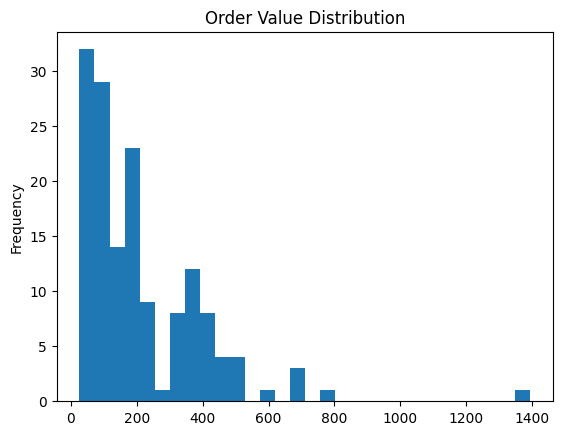

In [59]:
#Check skew:

conversions['order_value'].plot(kind='hist', bins=30)
plt.title("Order Value Distribution")
plt.show()

In [50]:
#Conversion Timing (Post-Treatment Audit)
conversions['conversion_time_hours'].describe()

count    150.00000
mean      33.21920
std       81.64099
min        0.00000
25%        3.85500
50%        4.80000
75%        5.51250
max      410.22000
Name: conversion_time_hours, dtype: float64

In [51]:
conversions['conversion_time_hours'].head()

0    2.25
1    3.62
2    3.33
3    3.55
4    2.92
Name: conversion_time_hours, dtype: float64

In [52]:
#User Segmentation 
conversions['customer_type'].value_counts(normalize=True)

customer_type
New          0.633333
Returning    0.266667
Direct       0.100000
Name: proportion, dtype: float64

In [54]:
conversions.groupby('customer_type')[['order_value', 'commission_earned']].mean().reset_index()

,customer_type,order_value,commission_earned
0,Direct,99.784000,2.676000
1,New,232.225579,5.581158
2,Returning,199.761000,4.834750


In [55]:
#User History (Potential Confounders)
conversions[['previous_orders_count', 'customer_lifetime_value']].describe()

,previous_orders_count,customer_lifetime_value
count,150.000000,150.000000
mean,0.433333,278.303867
std,0.915318,264.076490
min,0.000000,25.990000
25%,0.000000,79.990000
50%,0.000000,199.985000
75%,1.000000,382.307500
max,5.000000,1567.890000


In [56]:
conversions[['previous_orders_count', 'customer_lifetime_value']].head()

,previous_orders_count,customer_lifetime_value
0,0,49.99
1,3,245.87
2,0,199.99
3,2,389.75
4,0,59.99


In [58]:
products_catalog['product_asin'].is_unique

False

In [60]:
#Product Attribute Distributions
products_catalog[['price', 'discount_percentage', 'rating', 'review_count']].describe()

,price,discount_percentage,rating,review_count
count,63.000000,63.000000,63.000000,63.000000
mean,283.432540,9.793651,4.338095,50402.555556
std,388.561765,10.075775,0.179990,23490.570909
min,25.990000,0.000000,4.000000,12345.000000
25%,84.990000,0.000000,4.200000,34567.000000
50%,179.990000,12.000000,4.300000,45678.000000
75%,338.500000,20.000000,4.450000,67890.000000
max,2495.000000,31.000000,4.700000,125847.000000


In [62]:
#Confounding Signals
products_catalog.groupby('category')[['price', 'rating']].mean()

,price,rating
category,,
Automotive,49.9900,4.30000
Clothing,113.5000,4.35000
Electronics,234.9116,4.41200
Furniture,1160.5000,4.45000
Health & Fitness,728.5880,4.08000
Health & Personal Care,114.9900,4.20000
Home & Garden,361.9900,4.22000
Home Security,199.9900,4.10000
Kitchen,185.2925,4.38125


In [64]:
products_catalog[['price', 'rating', 'discount_percentage']].corr()


,price,rating,discount_percentage
price,1.000000,-0.066481,-0.238977
rating,-0.066481,1.000000,-0.153903
discount_percentage,-0.238977,-0.153903,1.000000


In [66]:
#Seasonality trend
products_catalog['seasonal_trend'].value_counts()

seasonal_trend
Year-round         27
New Year           10
Holiday season      6
Spring cleaning     5
Holiday peak        4
Back-to-school      3
Spring              2
Fall/Winter         2
Summer peak         2
Travel season       1
Marathon season     1
Name: count, dtype: int64

In [68]:
pd.crosstab(products_catalog['category'], products_catalog['seasonal_trend'], normalize='index')

seasonal_trend,Back-to-school,Fall/Winter,Holiday peak,Holiday season,Marathon season,New Year,Spring,Spring cleaning,Summer peak,Travel season,Year-round
category,,,,,,,,,,,
Automotive,0.0000,0.0000,0.00,0.00,0.0,0.00,0.000000,0.0,0.0000,0.00,1.000000
Clothing,0.0000,0.5000,0.00,0.00,0.0,0.50,0.000000,0.0,0.0000,0.00,0.000000
Electronics,0.0800,0.0000,0.16,0.08,0.0,0.00,0.000000,0.0,0.0000,0.04,0.640000
Furniture,0.0000,0.0000,0.00,0.00,0.0,0.00,0.000000,0.0,0.0000,0.00,1.000000
Health & Fitness,0.0000,0.0000,0.00,0.00,0.2,0.60,0.000000,0.0,0.0000,0.00,0.200000
Health & Personal Care,0.0000,0.0000,0.00,0.00,0.0,1.00,0.000000,0.0,0.0000,0.00,0.000000
Home & Garden,0.0000,0.0000,0.00,0.00,0.0,0.00,0.000000,1.0,0.0000,0.00,0.000000
Home Security,0.0000,0.0000,0.00,0.00,0.0,0.00,0.333333,0.0,0.0000,0.00,0.666667
Kitchen,0.0625,0.0625,0.00,0.25,0.0,0.25,0.000000,0.0,0.0625,0.00,0.312500


In [72]:
#Session Integrity
user_behaviour[['session_id', 'user_id']].isnull().sum()

session_id    0
user_id       0
dtype: int64

In [74]:
#One session → one user?
user_behaviour.groupby('session_id')['user_id'].nunique().value_counts()

user_id
1    110
Name: count, dtype: int64

In [76]:
#Traffic Source Structure
user_behaviour['traffic_source'].value_counts(normalize=True)

traffic_source
Social Media          0.461039
Organic Search        0.227273
Referral              0.097403
Video Platform        0.094156
Fitness Platform      0.038961
Direct                0.029221
Audio Platform        0.025974
Streaming Platform    0.025974
Name: proportion, dtype: float64

In [77]:
pd.crosstab(user_behaviour['traffic_source'], user_behaviour['device_type'], normalize='index')

device_type,Desktop,Mobile,Tablet
traffic_source,,,
Audio Platform,0.250000,0.500000,0.250000
Direct,0.666667,0.333333,0.000000
Fitness Platform,0.166667,0.833333,0.000000
Organic Search,0.700000,0.214286,0.085714
Referral,0.466667,0.400000,0.133333
Social Media,0.669014,0.288732,0.042254
Streaming Platform,0.000000,1.000000,0.000000
Video Platform,0.310345,0.275862,0.413793


In [79]:
#Funnel Progression
user_behaviour['conversion_funnel_stage'].value_counts()

conversion_funnel_stage
Awareness        110
Interest         110
Action            66
Consideration     22
Name: count, dtype: int64

In [82]:
#Funnel stage is post-treatment, can never control later.
user_behaviour.groupby('conversion_funnel_stage')['user_engagement_score'].mean()

conversion_funnel_stage
Action           9.242424
Awareness        7.594545
Consideration    8.113636
Interest         8.440909
Name: user_engagement_score, dtype: float64

In [84]:
#Engagement Distributions
user_behaviour[['time_on_page_seconds', 'scroll_depth_percentage', 'user_engagement_score']].describe()

,time_on_page_seconds,scroll_depth_percentage,user_engagement_score
count,308.000000,308.000000,308.000000
mean,73.655844,59.409091,8.287013
std,51.026388,32.717648,0.772803
min,3.000000,0.000000,6.200000
25%,33.000000,53.750000,7.800000
50%,71.000000,75.000000,8.300000
75%,109.500000,80.000000,8.900000
max,188.000000,95.000000,9.600000


In [87]:
#New vs Returning Users
user_behaviour['new_vs_returning'].value_counts(normalize=True)

new_vs_returning
New          0.655844
Returning    0.344156
Name: proportion, dtype: float64

In [89]:
user_behaviour.groupby('new_vs_returning')['user_engagement_score'].mean()

new_vs_returning
New          8.209901
Returning    8.433962
Name: user_engagement_score, dtype: float64

In [91]:
print(clicks['click_id'].isin(conversions['click_id']).mean())

0.65


In [93]:
print(clicks['product_asin'].isin(products_catalog['product_asin']).mean())

0.97


In [96]:
print(clicks['session_id'].isin(user_behaviour['session_id']).mean())

0.55


I conducted dataset-level EDA to validate structure, timing, and causal roles before merging. Each dataset was audited for integrity, treatment timing, and post-treatment variables to prevent causal leakage.

##### amazon_affiliate_clicks.csv

Role: Exposure / Treatment Assignment + Pre-Click Behavior

Variable	    Role	            Reason
- click_id	    Identifier	        Primary key
- user_id	    Identifier	        User-level linkage
- session_id	Identifier	        Session-level linkage
- timestamp	    Time Index	        Treatment timing
- product_asin	Treatment Link	    Links exposure to product
- product_title	Descriptive	No modeling role
- product_category	Treatment	Product exposure type
- product_price	Confounder	Affects click & conversion
- affiliate_link	Identifier	No modeling role
- source_page	Treatment	Traffic origin
- device_type	Confounder	Impacts behavior
- country	Confounder	Geo behavior bias
- click_position	Confounder	Visibility bias
- page_scroll_depth	Pre-Treatment Covariate	Engagement before click
- time_on_page_before_click	Pre-Treatment Covariate	Intent strength

##### amazon_affiliate_conversions.csv

Role: Outcomes + User History

Variable	Role	Reason
conversion_id	Identifier	Primary key
click_id	Join Key	Links to treatment
user_id	Identifier	User-level outcome
order_id	Identifier	Order reference
order_value	Outcome	Revenue metric
commission_rate	Structural	Revenue calculation
commission_earned	Outcome	Affiliate earnings
conversion_time_hours	Post-Treatment	Delay after exposure
customer_type	Confounder	New vs returning bias
payment_method	Descriptive	No causal role
customer_lifetime_value	Confounder	Historical value
previous_orders_count	Confounder	Purchase history


##### amazon_products_catalog.csv

Role: Structural Product Confounders

Variable	Role	Reason
product_asin	Join Key	Product identifier
product_title	Descriptive	No modeling role
brand	Confounder	Brand trust
category	Treatment	Product grouping
price	Confounder	Purchase decision
discount_percentage	Treatment Modifier	Incentive strength
rating	Confounder	Social proof
review_count	Confounder	Popularity bias
commission_rate	Structural	Revenue logic
bestseller_rank	Confounder	Visibility bias
seasonal_trend	Effect Modifier	Time-based impact

##### user_behavior_analytics.csv

Role: Session-Level Pre-Treatment & Funnel Signals

Variable	Role	Reason
session_id	Join Key	Session identifier
user_id	Identifier	User linkage
page_url	Descriptive	No modeling role
page_type	Confounder	Content type
time_on_page_seconds	Pre-Treatment Covariate	Engagement
scroll_depth_percentage	Pre-Treatment Covariate	Attention
traffic_source	Treatment	Acquisition channel
device_type	Confounder	UX variation
conversion_funnel_stage	Post-Treatment	Do NOT control
user_engagement_score	Post-Treatment	Aggregated metric
new_vs_returning	Confounder	Experience bias

This project applies causal inference principles to marketing analytics, conversion optimization, revenue analysis, and churn modeling.
Before merging datasets, each variable is explicitly assigned a causal role to avoid:

Data leakage

Post-treatment bias

Invalid counterfactual comparisons

This section documents the intended modeling role of every variable prior to dataset integration.

1️⃣ amazon_affiliate_clicks.csv

User Click Behavior & Exposure Assignment

This dataset captures treatment exposure and pre-click engagement signals, forming the foundation of traffic source and product exposure analysis.

Variable	Causal Role	Description
click_id	Identifier	Unique click event
user_id	Identifier	User linkage
session_id	Identifier	Session linkage
timestamp	Time Index	Exposure timing
product_asin	Treatment Link	Product exposure
product_title	Descriptive	Metadata
product_category	Treatment	Product category exposure
product_price	Confounder	Influences click & conversion
affiliate_link	Identifier	Tracking reference
source_page	Treatment	Originating page
device_type	Confounder	UX differences
country	Confounder	Geographic effects
click_position	Confounder	Visibility bias
page_scroll_depth	Pre-Treatment Covariate	Engagement prior to click
time_on_page_before_click	Pre-Treatment Covariate	User intent signal
2️⃣ amazon_affiliate_conversions.csv

Conversion Outcomes & Revenue Metrics

This dataset defines primary outcome variables and historical user context.

Variable	Causal Role	Description
conversion_id	Identifier	Unique conversion
click_id	Join Key	Exposure linkage
user_id	Identifier	User reference
order_id	Identifier	Order reference
order_value	Outcome	Purchase revenue
commission_rate	Structural	Affiliate logic
commission_earned	Outcome	Affiliate income
conversion_time_hours	Post-Treatment	Delay after exposure
customer_type	Confounder	New vs returning
payment_method	Descriptive	Transaction detail
customer_lifetime_value	Confounder	Historical value
previous_orders_count	Confounder	Purchase history

⚠️ Post-treatment variables are excluded from causal controls.

3️⃣ amazon_products_catalog.csv

Product Attributes & Structural Confounders

This dataset captures product-level characteristics that influence exposure and purchase decisions.

Variable	Causal Role	Description
product_asin	Join Key	Product identifier
product_title	Descriptive	Metadata
brand	Confounder	Brand trust
category	Treatment	Product category
price	Confounder	Purchase decision
discount_percentage	Treatment Modifier	Incentive strength
rating	Confounder	Social proof
review_count	Confounder	Popularity
commission_rate	Structural	Revenue calculation
bestseller_rank	Confounder	Visibility bias
seasonal_trend	Effect Modifier	Time-based variation
4️⃣ user_behavior_analytics.csv

Session-Level Engagement & Funnel Signals

This dataset provides pre-treatment behavioral context and post-exposure funnel progression.

Variable	Causal Role	Description
session_id	Join Key	Session identifier
user_id	Identifier	User linkage
page_url	Descriptive	Page reference
page_type	Confounder	Content type
time_on_page_seconds	Pre-Treatment Covariate	Engagement depth
scroll_depth_percentage	Pre-Treatment Covariate	Attention level
traffic_source	Treatment	Acquisition channel
device_type	Confounder	UX variation
conversion_funnel_stage	Post-Treatment	Funnel progression
user_engagement_score	Post-Treatment	Aggregated metric
new_vs_returning	Confounder	User familiarity

In [58]:
#Merging all tables to get a single table
user_df = (
    clicks
    .merge(user_behaviour, on="user_id", how="left")
)
user_df.head()

,click_id,user_id,session_id_x,timestamp_x,product_asin,product_title,product_category,product_price,affiliate_link,source_page,...,session_duration_minutes,traffic_source,device_type_y,browser,operating_system,screen_resolution,geographic_location,new_vs_returning,user_engagement_score,conversion_funnel_stage
0,CLK001,USR10001,SES20240101001,2024-01-01 08:15:23,B08N5WRWNW,Echo Dot (4th Gen) Smart speaker with Alexa,Electronics,49.99,https://amzn.to/3xyz123,/smart-home-devices,...,8.5,Organic Search,Desktop,Chrome,Windows 10,1920x1080,New York US,New,7.2,Awareness
1,CLK001,USR10001,SES20240101001,2024-01-01 08:15:23,B08N5WRWNW,Echo Dot (4th Gen) Smart speaker with Alexa,Electronics,49.99,https://amzn.to/3xyz123,/smart-home-devices,...,8.5,Organic Search,Desktop,Chrome,Windows 10,1920x1080,New York US,New,8.5,Interest
2,CLK001,USR10001,SES20240101001,2024-01-01 08:15:23,B08N5WRWNW,Echo Dot (4th Gen) Smart speaker with Alexa,Electronics,49.99,https://amzn.to/3xyz123,/smart-home-devices,...,8.5,Organic Search,Desktop,Chrome,Windows 10,1920x1080,New York US,New,9.1,Action
3,CLK002,USR10002,SES20240101002,2024-01-01 09:22:15,B07FZ8S74R,Fire TV Stick 4K streaming device,Electronics,39.99,https://amzn.to/3abc456,/streaming-devices,...,5.2,Social Media,Mobile,Safari,iOS 15,375x812,Los Angeles US,New,6.8,Awareness
4,CLK002,USR10002,SES20240101002,2024-01-01 09:22:15,B07FZ8S74R,Fire TV Stick 4K streaming device,Electronics,39.99,https://amzn.to/3abc456,/streaming-devices,...,5.2,Social Media,Mobile,Safari,iOS 15,375x812,Los Angeles US,New,7.9,Interest


In [60]:
product_df = conversions.merge(
    products_catalog,
    on="product_asin",
    how="left"
)
product_df.head()

,conversion_id,click_id,user_id,order_id,timestamp,product_asin,product_title_x,product_category,order_value,commission_rate_x,...,weight,color_options,size_options,commission_rate_y,affiliate_fee_structure,product_description,key_features,target_audience,seasonal_trend,inventory_status
0,CONV001,CLK001,USR10001,ORD2024010001,2024-01-01 10:30:45,B08N5WRWNW,Echo Dot (4th Gen) Smart speaker with Alexa,Electronics,49.99,0.040,...,0.75 lbs,"Charcoal,Glacier White,Twilight Blue",One Size,0.040,Fixed,Compact smart speaker with Alexa voice control,"Voice control,Music streaming,Smart home hub,C...",Tech enthusiasts,Holiday peak,In Stock
1,CONV002,CLK003,USR10003,ORD2024010002,2024-01-01 14:22:18,B08C1W5N87,Instant Pot Duo 7-in-1 Electric Pressure Cooker,Kitchen,79.95,0.030,...,11.8 lbs,"Stainless Steel,Black","3Qt,6Qt,8Qt",0.030,Tiered,Multi-functional electric pressure cooker,"7-in-1 functionality,Pressure cook,Slow cook,R...",Home cooks,Back-to-school,In Stock
2,CONV003,CLK006,USR10006,ORD2024010003,2024-01-01 16:45:22,B08QRST678,Ring Video Doorbell 4,Home Security,199.99,0.020,...,0.77 lbs,"Satin Nickel,Venetian Bronze",One Size,0.020,Fixed,Smart video doorbell with advanced motion dete...,"1080p HD video,Two-way talk,Motion alerts,Nigh...",Homeowners,Spring,In Stock
3,CONV004,CLK007,USR10007,ORD2024010004,2024-01-01 18:15:33,B07TUVW901,Fitbit Charge 5 Fitness Tracker,Health & Fitness,149.95,0.025,...,0.64 oz,"Black,Lunar White,Steel Blue","S,L",0.025,Tiered,Advanced fitness tracker with built-in GPS,"Built-in GPS,Heart rate monitoring,Sleep track...",Fitness enthusiasts,New Year,In Stock
4,CONV005,CLK009,USR10009,ORD2024010005,2024-01-01 19:28:44,B08ABC567,Keurig K-Mini Coffee Maker,Kitchen,59.99,0.030,...,4.6 lbs,"Black,Red,Gray,Oasis",One Size,0.030,Tiered,Single serve coffee maker for K-Cup pods,"Single serve,6-12oz brew sizes,Compact design,...",Coffee lovers,Year-round,In Stock


In [61]:
final_df = user_df.merge(
    product_df,
    on="user_id",
    how="left"
)
final_df.head()

,click_id_x,user_id,session_id_x,timestamp_x,product_asin_x,product_title,product_category_x,product_price,affiliate_link,source_page,...,weight,color_options,size_options,commission_rate_y,affiliate_fee_structure,product_description,key_features,target_audience,seasonal_trend,inventory_status
0,CLK001,USR10001,SES20240101001,2024-01-01 08:15:23,B08N5WRWNW,Echo Dot (4th Gen) Smart speaker with Alexa,Electronics,49.99,https://amzn.to/3xyz123,/smart-home-devices,...,0.75 lbs,"Charcoal,Glacier White,Twilight Blue",One Size,0.04,Fixed,Compact smart speaker with Alexa voice control,"Voice control,Music streaming,Smart home hub,C...",Tech enthusiasts,Holiday peak,In Stock
1,CLK001,USR10001,SES20240101001,2024-01-01 08:15:23,B08N5WRWNW,Echo Dot (4th Gen) Smart speaker with Alexa,Electronics,49.99,https://amzn.to/3xyz123,/smart-home-devices,...,0.21 lbs,Black,One Size,0.04,Fixed,4K Ultra HD streaming stick with Alexa Voice R...,"4K streaming,Alexa remote,Dolby Vision,HDR10+",Cord cutters,Year-round,In Stock
2,CLK001,USR10001,SES20240101001,2024-01-01 08:15:23,B08N5WRWNW,Echo Dot (4th Gen) Smart speaker with Alexa,Electronics,49.99,https://amzn.to/3xyz123,/smart-home-devices,...,0.75 lbs,"Charcoal,Glacier White,Twilight Blue",One Size,0.04,Fixed,Compact smart speaker with Alexa voice control,"Voice control,Music streaming,Smart home hub,C...",Tech enthusiasts,Holiday peak,In Stock
3,CLK001,USR10001,SES20240101001,2024-01-01 08:15:23,B08N5WRWNW,Echo Dot (4th Gen) Smart speaker with Alexa,Electronics,49.99,https://amzn.to/3xyz123,/smart-home-devices,...,0.21 lbs,Black,One Size,0.04,Fixed,4K Ultra HD streaming stick with Alexa Voice R...,"4K streaming,Alexa remote,Dolby Vision,HDR10+",Cord cutters,Year-round,In Stock
4,CLK001,USR10001,SES20240101001,2024-01-01 08:15:23,B08N5WRWNW,Echo Dot (4th Gen) Smart speaker with Alexa,Electronics,49.99,https://amzn.to/3xyz123,/smart-home-devices,...,0.75 lbs,"Charcoal,Glacier White,Twilight Blue",One Size,0.04,Fixed,Compact smart speaker with Alexa voice control,"Voice control,Music streaming,Smart home hub,C...",Tech enthusiasts,Holiday peak,In Stock


In [62]:
list(final_df.columns)

['click_id_x',
 'user_id',
 'session_id_x',
 'timestamp_x',
 'product_asin_x',
 'product_title',
 'product_category_x',
 'product_price',
 'affiliate_link',
 'source_page',
 'user_agent',
 'ip_address',
 'country',
 'device_type_x',
 'click_position',
 'page_scroll_depth',
 'time_on_page_before_click',
 'referrer_url',
 'utm_source',
 'utm_medium',
 'utm_campaign',
 'session_id_y',
 'timestamp_y',
 'page_url',
 'page_title',
 'page_type',
 'time_on_page_seconds',
 'scroll_depth_percentage',
 'bounce_rate',
 'exit_rate',
 'page_views_in_session',
 'session_duration_minutes',
 'traffic_source',
 'device_type_y',
 'browser',
 'operating_system',
 'screen_resolution',
 'geographic_location',
 'new_vs_returning',
 'user_engagement_score',
 'conversion_funnel_stage',
 'conversion_id',
 'click_id_y',
 'order_id',
 'timestamp',
 'product_asin_y',
 'product_title_x',
 'product_category_y',
 'order_value',
 'commission_rate_x',
 'commission_earned',
 'quantity_purchased',
 'conversion_time_hours

In [63]:
final_df.isna().sum()

click_id_x               0
user_id                  0
session_id_x             0
timestamp_x              0
product_asin_x           0
                      ... 
product_description    128
key_features           128
target_audience        128
seasonal_trend         128
inventory_status       128
Length: 82, dtype: int64